In [2]:
from sklearn.datasets import load_iris

bunch = load_iris()
X = bunch['data']
Y = bunch['target']

C:\Users\Pikam\anaconda3\envs\scikit-learn\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Pikam\anaconda3\envs\scikit-learn\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


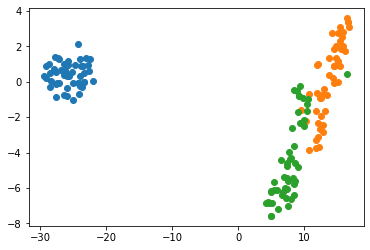

In [3]:
from matplotlib import pyplot
from numpy import where
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', random_state=0)
x = tsne.fit_transform(X)

def plot_clusters(X, cluster_ids):
    for class_value in range(3):
        row_ix = where(cluster_ids == class_value)
        pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
    pyplot.show()
    
plot_clusters(x, Y)